## Dimensionality Reduction:

- To reduce the number of columns present in the data
- There are 2 types of Dimensionality Reduction Techniques  
    a. Principal Component Analysis(PCA)  
    b. Linear Discriminant Analysis(LDA)  
    
- The concept of both the above techniques is to reduce the number of columns present in the data
- Working : Derive a new set of features (m) out of the original features from the data(n)
- m < n
- Accuracy is not compromised from these newly derived columns

## Load the standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [5]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Seperate X and y

In [6]:
X = data.drop('species', axis = 1)
y = data['species']

## Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms

MinMaxScaler()

In [8]:
X = mms.fit_transform(X)

## Split the data into train test split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Encoding the species column

In [10]:
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [11]:
dic = {'setosa' : 0, 'virginica' : 1, 'versicolor' : 2}
y = y.replace(dic)
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

In [12]:
y.value_counts()

0    50
2    50
1    50
Name: species, dtype: int64

## Applying Pricinpal Component Analysis to reduce the number of columns from the data

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca

PCA(n_components=2)

In [14]:
res = pca.fit_transform(X)
res

array([[-6.30702931e-01,  1.07577910e-01],
       [-6.22904943e-01, -1.04259833e-01],
       [-6.69520395e-01, -5.14170597e-02],
       [-6.54152759e-01, -1.02884871e-01],
       [-6.48788056e-01,  1.33487576e-01],
       [-5.35272778e-01,  2.89615724e-01],
       [-6.56537790e-01,  1.07244911e-02],
       [-6.25780499e-01,  5.71335411e-02],
       [-6.75643504e-01, -2.00703283e-01],
       [-6.45644619e-01, -6.72080097e-02],
       [-5.97408238e-01,  2.17151953e-01],
       [-6.38943190e-01,  3.25988375e-02],
       [-6.61612593e-01, -1.15605495e-01],
       [-7.51967943e-01, -1.71313322e-01],
       [-6.00371589e-01,  3.80240692e-01],
       [-5.52157227e-01,  5.15255982e-01],
       [-5.77053593e-01,  2.93709492e-01],
       [-6.03799228e-01,  1.07167941e-01],
       [-5.20483461e-01,  2.87627289e-01],
       [-6.12197555e-01,  2.19140388e-01],
       [-5.57674300e-01,  1.02109180e-01],
       [-5.79012675e-01,  1.81065123e-01],
       [-7.37784662e-01,  9.05588211e-02],
       [-5.

## Convert PCA output to DataFrame

In [15]:
pca_data = pd.DataFrame(res, columns = ['PC1', 'PC2'])
pca_data['Species'] = y
pca_data

,PC1,PC2,Species
0,-0.630703,0.107578,0
1,-0.622905,-0.104260,0
2,-0.669520,-0.051417,0
3,-0.654153,-0.102885,0
4,-0.648788,0.133488,0
...,...,...,...
145,0.551462,0.059841,1
146,0.407146,-0.171821,1
147,0.447143,0.037560,1
148,0.488208,0.149678,1


## Seperate X and y

In [16]:
X = pca_data.drop('Species', axis = 1)
y = pca_data['Species']

## Split the data into train test split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Apply Log Reg on the X_train and y_train

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [20]:
lr.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = lr.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8888888888888888

## Apply log reg on the original data and check the acuracy

In [28]:
X = data.drop('species', axis = 1)
y = data['species']

In [29]:
dic = {'setosa' : 0, 'virginica' : 1, 'versicolor' : 2}
y = y.replace(dic)
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

## Split the data


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [32]:
lr.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = lr.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred)

0.9736842105263158

## Note:

- Dimensionality Reduction is a Data Preprocessing step.
- Accuracy on the original data with 4 cols is 97%, where after applying pca, the accuracy is 88% with only 2 columns.

## Boxplot : used for Univariate analysis (Single Numerical Column Analysis)

- Used for only single column analysis
- Used only for numerical column analysis
- widely used for outlier detection 

<Axes: xlabel='petal_length'>

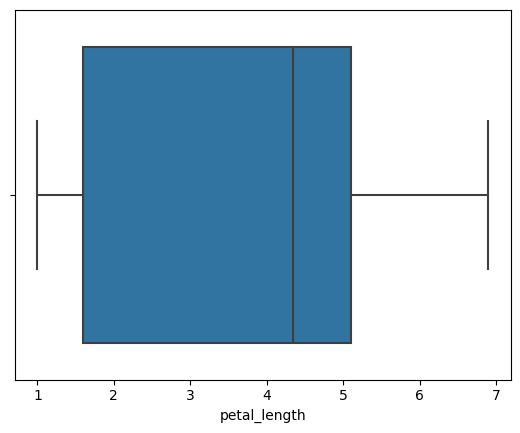

In [36]:
sns.boxplot(x = data['petal_length'])

## Observations:

- No outliers present in the petal_length column

In [37]:
data['petal_length'].describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

<Axes: xlabel='petal_length', ylabel='Density'>

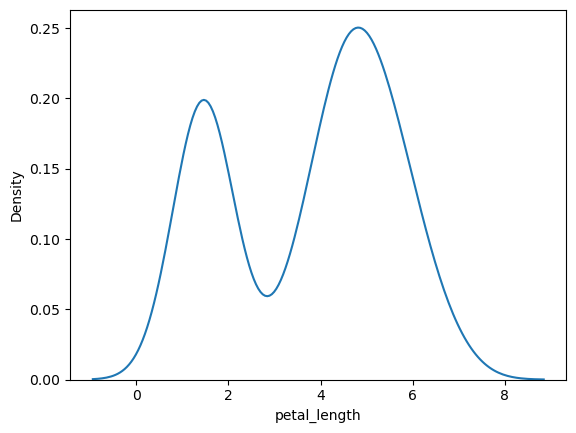

In [38]:
sns.kdeplot(x = data['petal_length'])